# day40


In [5]:
# 븐류 결과,,, 여러종류
# keras_Reuters [ 2 => 40 ] # LSTM기반 다중클래스 분류 문제 
# 과거 baysian filter => LSTM
from jupyterthemes import jtplot
jtplot.style(theme='gruvboxd', context='paper', spines=True, 
             ticks=True, grid=True, gridlines='dotted', figsize=(6,4.5))

## keras 용어 설명 

### 개체명 인식모델
#### 전처리작업 (토큰화,, 단어단위 토큰화 + 품사태깅 ) =====> 입력) 모델링

In [10]:
from nltk import word_tokenize, pos_tag, ne_chunk

In [11]:
sentence = "홍길동이는 오늘 멀티캠퍼스에 지각했습니다"
pos_tag(word_tokenize(sentence)) # 토큰화, 품사태깅 완료 

"""
'JJ' = Adjective // '홍길동이는'
'NNP' = Proper noun, singular //'오늘'
"""

"\n'JJ' = Adjective // '홍길동이는'\n'NNP' = Proper noun, singular //'오늘'\n"

In [12]:
sentence = "gildong is studying at MULCAM in Seoul"
sentence = pos_tag(word_tokenize(sentence)) # 토큰화, 품사태깅 완료 
print(sentence)

[('gildong', 'NN'), ('is', 'VBZ'), ('studying', 'VBG'), ('at', 'IN'), ('MULCAM', 'NNP'), ('in', 'IN'), ('Seoul', 'NNP')]


In [13]:
ne_chunk(sentence)
# 개체명 인식
"""
Tree('S', [('gildong', 'NN'), ('is', 'VBZ'), ('studying', 'VBG'), ('at', 'IN'), 
Tree('ORGANIZATION', [('MULCAM', 'NNP')]), ('in', 'IN'), # org : 조직
Tree('GPE', [('Seoul', 'NNP')])]) # GPE : 위치
"""

"\nTree('S', [('gildong', 'NN'), ('is', 'VBZ'), ('studying', 'VBG'), ('at', 'IN'), \nTree('ORGANIZATION', [('MULCAM', 'NNP')]), ('in', 'IN'), # org : 조직\nTree('GPE', [('Seoul', 'NNP')])]) # GPE : 위치\n"

### 품사태깅

In [14]:
from keras.datasets import reuters


Using TensorFlow backend.


In [15]:
(xtrain, ytrain), (xtest, ytest) = reuters.load_data(num_words=None, test_split=0.2)
# 뉴스데이터 다운로드후 data split 
# 빈도수 많든 적든 출력 num_words=None
#  빈도수 num_words=1000 제한선

In [16]:
# train data => 분류기 생성
# test data => categorial 
# type(xtrain)
# array
xtrain[0] 
len(xtest[0])
# 원본 텍스트 data => 토큰화, 정수인코딩 정제되어진 data
# 단어들의 빈도에 따라 인데긋가 부여 되어진 상태 


145

In [17]:

len(xtrain)
# 8982 개의 뉴스기사 
xtrain[8981]
# 1 - 등장빈도수 1등 / 단어가 가장많이 등장 
# 27595 - 등장 빈도수가 27595 등 
# ex) The ... ... ... ... (1)
# ex) ... USA ... ... ... (27595)


[1,
 227,
 2406,
 91,
 21969,
 125,
 2855,
 21,
 4,
 3976,
 76,
 7,
 4,
 757,
 481,
 3976,
 790,
 5259,
 5654,
 9,
 111,
 149,
 8,
 7,
 10,
 76,
 223,
 51,
 4,
 417,
 8,
 1047,
 91,
 6917,
 1688,
 340,
 7,
 194,
 9411,
 6,
 1894,
 21,
 127,
 2151,
 2394,
 1456,
 6,
 3034,
 4,
 329,
 433,
 7,
 65,
 87,
 1127,
 10,
 8219,
 1475,
 290,
 9,
 21,
 567,
 16,
 1926,
 24,
 4,
 76,
 209,
 30,
 4033,
 6655,
 5654,
 8,
 4,
 60,
 8,
 4,
 966,
 308,
 40,
 2575,
 129,
 15562,
 295,
 277,
 1071,
 9,
 24,
 286,
 2114,
 234,
 222,
 9,
 4,
 906,
 3994,
 8519,
 114,
 5758,
 1752,
 7,
 4,
 113,
 17,
 12]

In [18]:
len(xtest)


2246

In [19]:

xtrain[0] # 3에해당하는 

[1,
 27595,
 28842,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [20]:
len(ytrain)

8982

In [21]:
# ytrain 종류의 값
ytrain # 뉴스기사의종류 # category 번호

array([ 3,  4,  3, ..., 25,  3, 25], dtype=int64)

In [22]:
max(ytrain) + 1
# 46 개 카테고리 (index + 1 )

46

In [23]:
# test data 2000옆편 data .. 
# 46개 카테고리중 하나로 도출 (multi_layer)... 해당 예측값과 실제값 비교
# categorical_
len(xtrain)
len(xtest)
num_classes = max(ytrain) + 1
num_classes # 카테고리수 

46

In [24]:
# 뉴스 기사 최대 길이 
xtrain # 뉴스기사 ... () 1 : 첫번쨰 기사 
print(max(len(line) for line in xtrain)) # line [<- 리스트 요소들이 들어감]


2376


In [25]:
# 뉴스 기사 길이 평균 길이 
# sum(map(len, xtrain)) # xtrain data 의 뉴스기사 길이 합 ... 총단어개수 
sum(map(len, xtrain)) / len(xtrain) # 평균 뉴스기사 길이 145
# padding 

145.5398574927633

(array([2.292e+03, 2.917e+03, 1.098e+03, 8.240e+02, 4.880e+02, 3.410e+02,
        2.480e+02, 1.640e+02, 1.160e+02, 1.180e+02, 7.600e+01, 5.900e+01,
        6.400e+01, 4.300e+01, 4.700e+01, 2.800e+01, 2.500e+01, 1.500e+01,
        1.000e+01, 1.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00]),
 array([  13.  ,   60.26,  107.52,  154.78,  202.04,  249.3 ,  296.56,
         343.82,  391.08,  438.34,  485.6 ,  532.86,  580.12,  627.38,
         674.64,  721.9 ,  769.16,  816.42,  863.68,  910.94,  958.2 ,
        1005.46, 1052.72, 1099.98, 1147.24, 1194.5 , 1241.76, 1289.02,
        1336.28, 1383.54, 1430.8 , 1478.06, 1525.32, 1572.58, 1619.84,
        1667.1 , 1714

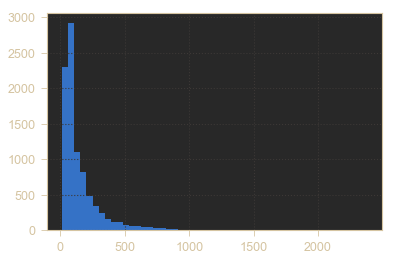

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist([len(s) for s in xtrain], bins=50) # []안 data를 bins 구간에 맞춰서 출력하는 구문

In [27]:
# visualization Result
# 주로 1000 아래 속하고 (200-300 내에 집중포화)
# 뉴스기사에 출몰하는 단어들의 빈도수 graph화


In [28]:
import seaborn as sns

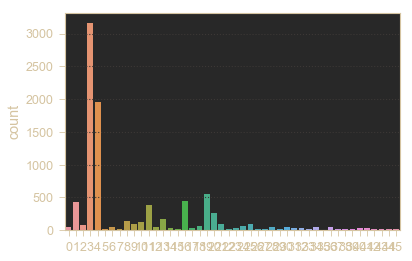

In [29]:
sns.countplot(ytrain)
# ytrain(0-46) __ y 축, 해당 category 에 해당하는 기사 개수 # max:3

In [30]:
import numpy as np
unique_elements, counts_elements=np.unique(ytrain, return_counts=True) 
# return_counts=True : count를 return 해준다
dict(zip(unique_elements,counts_elements))
# (카테고리 번호, 해당 카테고리 해당 뉴스기사 개수)

{0: 55,
 1: 432,
 2: 74,
 3: 3159,
 4: 1949,
 5: 17,
 6: 48,
 7: 16,
 8: 139,
 9: 101,
 10: 124,
 11: 390,
 12: 49,
 13: 172,
 14: 26,
 15: 20,
 16: 444,
 17: 39,
 18: 66,
 19: 549,
 20: 269,
 21: 100,
 22: 15,
 23: 41,
 24: 62,
 25: 92,
 26: 24,
 27: 15,
 28: 48,
 29: 19,
 30: 45,
 31: 39,
 32: 32,
 33: 11,
 34: 50,
 35: 10,
 36: 49,
 37: 19,
 38: 19,
 39: 24,
 40: 36,
 41: 30,
 42: 13,
 43: 21,
 44: 12,
 45: 18}

In [31]:
np.asarray((unique_elements, counts_elements)) 
# 2차원 array형식을 취하면서, array 병합된다

array([[   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
          11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
          22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
          33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
          44,   45],
       [  55,  432,   74, 3159, 1949,   17,   48,   16,  139,  101,  124,
         390,   49,  172,   26,   20,  444,   39,   66,  549,  269,  100,
          15,   41,   62,   92,   24,   15,   48,   19,   45,   39,   32,
          11,   50,   10,   49,   19,   19,   24,   36,   30,   13,   21,
          12,   18]], dtype=int64)

In [32]:
word_index=reuters.get_word_index()
word_index
## 각각의 단어들에 대한 인덱스 번호 출력되어진다
## 출력문해석 _ 숫자가 적을수록 빈도수가 많은 단어에 해당합니다 

{'mdbl': 10996,
 'fawc': 16260,
 'degussa': 12089,
 'woods': 8803,
 'hanging': 13796,
 'localized': 20672,
 'sation': 20673,
 'chanthaburi': 20675,
 'refunding': 10997,
 'hermann': 8804,
 'passsengers': 20676,
 'stipulate': 20677,
 'heublein': 8352,
 'screaming': 20713,
 'tcby': 16261,
 'four': 185,
 'grains': 1642,
 'broiler': 20680,
 'wooden': 12090,
 'wednesday': 1220,
 'highveld': 13797,
 'duffour': 7593,
 '0053': 20681,
 'elections': 3914,
 '270': 2563,
 '271': 3551,
 '272': 5113,
 '273': 3552,
 '274': 3400,
 'rudman': 7975,
 '276': 3401,
 '277': 3478,
 '278': 3632,
 '279': 4309,
 'dormancy': 9381,
 'errors': 7247,
 'deferred': 3086,
 'sptnd': 20683,
 'cooking': 8805,
 'stratabit': 20684,
 'designing': 16262,
 'metalurgicos': 20685,
 'databank': 13798,
 '300er': 20686,
 'shocks': 20687,
 'nawg': 7972,
 'tnta': 20688,
 'perforations': 20689,
 'affiliates': 2891,
 '27p': 20690,
 'ching': 16263,
 'china': 595,
 'wagyu': 16264,
 'affiliated': 3189,
 'chino': 16265,
 'chinh': 16266,
 '

##### dict => items() 사용가능 .... ( key : 단어 /. value : 인덱스 ) 도출

In [33]:
index_to_word={}
for key, value in word_index.items():
    index_to_word[value] = key
# 특정단어에 해당하는 인덱싱번호가 무엇이냐 

In [34]:
# index_to_word[1]
index_to_word[20] 
# 해당 인덱싱 순위에 해당하는 단어 도출

'is'

In [35]:
# xtrain[0]
# 이 결과에 해당하는 단어들을 확인해보고 싶다 
# [index_to_word[x] for x in xtrain[0]]
# 해당 뉴스기사 확인 
print(' '.join([index_to_word[x] for x in xtrain[0]]))

the wattie nondiscriminatory mln loss for plc said at only ended said commonwealth could 1 traders now april 0 a after said from 1985 and from foreign 000 april 0 prices its account year a but in this mln home an states earlier and rise and revs vs 000 its 16 vs 000 a but 3 psbr oils several and shareholders and dividend vs 000 its all 4 vs 000 1 mln agreed largely april 0 are 2 states will billion total and against 000 pct dlrs


### LSTM 사용하여 실제 모델링작업 착수

In [36]:
# 확률 공부.,.. 비슷한 유형의 공부 다룬적있어

#### LSTM 뉴스분류

In [37]:
(xtrain,ytrain),(xtest,ytest)=reuters.load_data(num_words=1000, test_split=0.2)
# 단어의 등장빈도수가 1000등안에 있는 단어들 대상으로 뉴스분류기 생성해보자
max_len=100 # 단어의 최대개수 100개
# 부족한부분은 padding 을 통해 0 을넣어준다

In [38]:
from keras.preprocessing import sequence


In [39]:
xtrain = sequence.pad_sequences(xtrain, maxlen = max_len)
xtest = sequence.pad_sequences(xtest, maxlen = max_len)

In [40]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Embedding
from keras.preprocessing import sequence
from keras.utils import np_utils


In [41]:
# ohe 필요
ytrain = np_utils.to_categorical(ytrain)
ytrain

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [42]:
ytest = np_utils.to_categorical(ytest)
# ytest


In [43]:
model = Sequential()
model.add(Embedding(1000,128))# 단어가 너무커 # 압축필요
# (단어벡터수, 임베딩 벡터의 차원 )
# 의미 ) 128 차원내 1000개의 단어벡터 생성 
model.add(LSTM(128))
model.add(Dense(46, activation='softmax')) 
# 의미) 46 개 중 가장 큰값 출력 # 활성화함수 출력층에서 씀

W0828 13:37:02.320058 10776 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0828 13:37:02.348979 10776 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0828 13:37:02.351970 10776 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [44]:
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

W0828 13:37:02.519521 10776 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0828 13:37:02.538470 10776 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [45]:
history = model.fit(xtrain, ytrain, batch_size=100, 
                    epochs=20, validation_data=(xtest, ytest))
history


W0828 13:37:02.986625 10776 deprecation.py:323] From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0828 13:37:03.614543 10776 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 8982 samples, validate on 2246 samples
Epoch 1/20
8982/8982 [==============================] - 18s 2ms/step - loss: 2.5573 - acc: 0.3570 - val_loss: 2.0886 - val_acc: 0.4938
Epoch 2/20
8982/8982 [==============================] - 16s 2ms/step - loss: 2.0126 - acc: 0.5006 - val_loss: 1.9621 - val_acc: 0.5209
Epoch 3/20
8982/8982 [==============================] - 15s 2ms/step - loss: 1.9516 - acc: 0.5169 - val_loss: 1.8804 - val_acc: 0.5485
Epoch 4/20
8982/8982 [==============================] - 14s 2ms/step - loss: 1.8554 - acc: 0.5352 - val_loss: 1.8115 - val_acc: 0.5588
Epoch 5/20
8982/8982 [==============================] - 14s 2ms/step - loss: 1.6993 - acc: 0.5709 - val_loss: 1.6983 - val_acc: 0.5748
Epoch 6/20
8982/8982 [==============================] - 14s 2ms/step - loss: 1.6224 - acc: 0.5826 - val_loss: 1.6650 - val_acc: 0.5833
Epoch 7/20
8982/8982 [==============================] - 14s 2ms/step - loss: 1.5457 - acc: 0.5966 - val_loss: 1.5705 - val_acc: 0.5926
Epoch 8

<function matplotlib.pyplot.show(*args, **kw)>

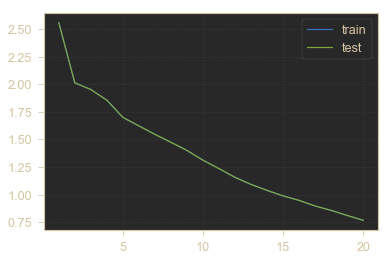

In [46]:
# print("테스트정확도:", model.evaluate(xtest, ytest)[1])
epochs=range(1,len(history.history['acc'])+1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['loss'])
plt.legend(['train','test'],loc='upper right')
plt.show